# "Creating Chinese Word Clouds"
> "visual representation of text data"

- toc: true 
- badges: true
- comments: true
- categories: [level-4, chapter-4, jieba, text-mining, data-visualization]
- image: images/wordcloud.png

***

## **Background**

Hello. In this lesson, you will learn how to create your word clouds in Chinese languages using Python. Different from the online tools, using specific libraries ["Jieba"](https://github.com/fxsjy/jieba) highly improve the performance of tokenizing Chinese text. You can also customize different options such as the colour use or shape mask. If you are running this notebook in [Colab](https://pinkychow1010.github.io/digital-chinese-history-blog/level-1/chapter-1/jupyter/colab/2020/01/30/JupyterNotebook_Colab_Basics.html), you do not need to download or install any items. We will create the word cloud using predefined images and texts, but you can also change it to any content you like.

<br>

As mentioned in the [instructions](https://pinkychow1010.github.io/digital-chinese-history-blog/about/), all materials can be open in Colab as Jupyter notebooks. In this way, users can run the code in the cloud. It is highly recommended to follow the [tutorials](https://pinkychow1010.github.io/digital-chinese-history-blog/) in the right order. To optimize your learning experience, you are supposed to know the Python basics, including how to write and use a function. They are all included in the previous tutorials.

## Connection to Google Drive

As the resources are in the drive, we need to allow Colab to connect to the **Google Drive**. It can be done by running the following code. Then a new window will be open for you to **sign in** and **give permission**.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Download Resources

To run all the code, we have to download a few items using **wget**, which is a way to retrieve content from web servers. To understand more about wget, you can visit [here](https://www.hostinger.com/tutorials/wget-command-examples/).

Because the library we are going to use do not have a default option to display Chinese, we have to download a Chinese font for proper display. If you run the following code, the resources will be downloaded into your **Google Drive**.

* Chinese Font

In [3]:
! wget https://raw.githubusercontent.com/victorgau/wordcloud/master/SourceHanSansTW-Regular.otf -o /dev/null -P /content/drive/MyDrive/

To prevent common words to be classified as keywords, we need to define stopwords ourselves. There is existing resources for that in Chinese, but you can also create you own.

* Stopwords

In [ ]:
! wget https://github.com/stopwords-iso/stopwords-zh/blob/master/stopwords-zh.txt -P /content/drive/MyDrive/

Then, we have to download the images, including the ones for the mask and color selection.

* Images

In [ ]:
! wget https://github.com/pinkychow1010/digital-chinese-history-blog/blob/master/images/tree.jpg -P /content/drive/MyDrive/

In [ ]:
! wget https://github.com/pinkychow1010/digital-chinese-history-blog/blob/master/images/song.png -P /content/drive/MyDrive/

## Set Up Environment

We need to download and import specific libraries to set up our cloud environment by running the following code. We will download the library using **pip**.

### Download Library

In [ ]:
# The library for Chinese Text Processing
! pip install jieba
# The library for Creating Word Cloud
! pip install wordcloud

### Import Library

In [27]:
# Word Cloud
import jieba
from wordcloud import WordCloud, ImageColorGenerator

# General Library
import matplotlib.pyplot as plt
import os

# Image Manipulation
from imageio import imread
from PIL import Image
import numpy as np

# File Management
from google.colab import files

## Test Processing

To process our text, we can use the following function. What it is doing is to tokenize the text to words using `jieba.cut()` and clean the list by removing empty strings and stopwords.

In [14]:
def jieba_processing_txt(text,stopwords_path):
  """
  Creating word list from text
  text: str
    The text for generating word list
  stopwords_path: path
    A path to stopwords
  returns: str
    Word List
  """
    # assign empty list for words
    mywordlist = []
    # tokenization
    seg_list = jieba.cut(text, cut_all=False)
    # join to string
    liststr = "/ ".join(seg_list)

    # read stop word text file
    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    # remove empty strings and stopwords
    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)

    # return final list
    return ' '.join(mywordlist)

We need to define a stopword list and the text for our function. Below is the stopwords path where the downloaded file is stored. We will also copy a part of text from **‰∏ÅÂâáËâØÊñáÈõÜ**.

In [16]:
stopwords_path = r"/content/drive/MyDrive/stopwords-zh.txt"

In [15]:
txt = """
„ÄäÂÆãÂè≤„ÄãÂç∑‰∫å‰∫î‚óã„ÄäÁü≥ÂÆà‰ø°‰º†„Äã‰∫ëÔºö

Âª∫ÈöÜ‰∫åÂπ¥ÔºåÁßªÈïáÈÉìÂ∑ûÔºåÂÖº‰æçÂç´‰∫≤ÂÜõÈ©¨Ê≠•ÂÜõÈÉΩÊåáÊå•‰ΩøÔºå
ËØèËµêÊú¨Â∑ûÂÆÖ‰∏ÄÂå∫„ÄÇ ‰πæÂæ∑ÂàùÔºåÂ∏ùÂõ†ÊôöÊúù‰∏éÂÆà‰ø°Á≠âÈ•ÆÈÖíÔºåÈÖí
ÈÖ£ÔºåÂ∏ùÊõ∞Ôºö ‚ÄúÊàëÈùûÂ∞îÊõπ‰∏çÂèäÊ≠§Ôºõ ÁÑ∂Âêæ‰∏∫Â§©Â≠êÔºåÊÆä‰∏çËã•‰∏∫ËäÇ
Â∫¶‰Ωø‰πã‰πê„ÄÇ ÂêæÁªàÂ§ïÊú™Â∞ùÂÆâÊûïËÄåÂçß„ÄÇ‚ÄùÂÆà‰ø°Á≠âÈ°øÈ¶ñÊõ∞Ôºö ‚Äú‰ªä
Â§©ÂëΩÂ∑≤ÂÆöÔºåË∞ÅÂ§çÊï¢ÊúâÂºÇÂøÉÔºü Èôõ‰∏ã‰Ωï‰∏∫Âá∫Ê≠§Ë®ÄËÄ∂Ôºü‚ÄùÂ∏ùÊõ∞Ôºö
‚Äú‰∫∫Â≠∞‰∏çÊ¨≤ÂØåË¥µÔºå‰∏ÄÊó¶Êúâ‰ª•ÈªÑË¢çÂä†Ê±ù‰πãË∫´ÔºåËôΩÊ¨≤‰∏ç‰∏∫ÔºåÂÖ∂
ÂèØÂæó‰πé„ÄÇ‚ÄùÂÆà‰ø°Á≠âË∞¢Êõ∞Ôºö ‚ÄúËá£ÊÑö‰∏çÂèäÊ≠§ÔºåÂîØÈôõ‰∏ãÂìÄÁüú‰πã„ÄÇ‚Äù
Â∏ùÊõ∞Ôºö ‚Äú‰∫∫ÁîüÈ©πËøáÈöôÂ∞îÔºå‰∏çÂ¶ÇÂ§öÁßØÈáë„ÄÅÂ∏ÇÁî∞ÂÆÖÔºå‰ª•ÈÅóÂ≠êÂ≠ôÔºå
Ê≠åÂÑøËàûÂ•≥Ôºå‰ª•ÁªàÂ§©Âπ¥„ÄÇ ÂêõËá£‰πãÈó¥ÔºåÊó†ÊâÄÁåúÂ´åÔºå‰∏ç‰∫¶ÂñÑ‰πéÔºü‚Äù
ÂÆà‰ø°Ë∞¢Êõ∞Ôºö ‚ÄúÈôõ‰∏ãÂøµÂèäÊ≠§ÔºåÊâÄË∞ìÁîüÊ≠ªËÄåËÇâÈ™®‰πü„ÄÇ‚ÄùÊòéÊó•ÔºåÁöÜ
Áß∞ÁóÖÔºå‰πûËß£ÂÖµÊùÉ„ÄÇ Â∏ù‰ªé‰πãÔºåÁöÜ‰ª•Êï£ÂÆòÂ∞±Á¨¨ÔºåËµèËµâÁîöÂéö„ÄÇ

ËâØË∞®ÊåâÔºö Ê≠§Âç≥‰∏ñ‰º†ÊùØÈÖíÈáäÂÖµÊùÉ‰∏Ä‰∫ãÊâÄÊú¨„ÄÇ ÊùØÈÖíÈáäÂÖµÊùÉ‰∏Ä
‰∫ãÔºå‰∏ñÊâÄËâ≥Áß∞„ÄÇ Áõñ‰∫î‰ª£È™ÑÂÖµÊÇçÂ∞ÜÔºåÂä´ÊåÅÂâ≤ÊçÆÔºåÂéÜÊó∂‰∫îÂçÅ‰ΩôÂπ¥Ôºå
ÈõÑÈ∏∑Â¶ÇÊ¢ÅÂ§™Á•ñÂë®‰∏ñÂÆóËæàÔºåÊõæ‰∏çËÉΩÂΩªÂ∫ïÁ∫†Ê≠£„ÄÇ ËÄåÂÆãÂ§™Á•ñ‰πÉ‰∫éÊùØ
ÈÖíË®ÄÊ¨¢‰πãÈôÖËß£Èô§ËØ∏Â∞ÜÂÖµÊüÑÔºå‰ΩøÂπ≤ÊààÊã¢Êîò‰πãÂ±ÄÔºåÂåñ‰∏∫ÈõçÁÜôÂûÇÊã±
‰πãÊ≤ªÔºåÊòØ‰∏ç‰ΩÜ‰∏∫ÂõΩÂè≤Âπ≥Ê∑ª‰∏ÄÂ§ß‰Ω≥ËØùÔºåÊäë‰∏î‰∏∫ÂÆãÂÆ§Â•†‰∏âÁôæÂπ¥Êñá

Ê≤ª‰πãÂü∫ÔºåÂÖ∂ÂÖ≥Á≥ª‰πãÈáçÂ§ßÔºå‰∏çË®ÄÂèØÂñª„ÄÇ ÊÉüÂÆûÈôÖÊîøÊ≤ª‰πã‰∏≠ÔºåÂ•áËøπ‰æã
‰∏çÂ§öÊúâ„ÄÇ Áü≥ÂÆà‰ø°Ëæà‰πãËß£Èô§ÂÖµÊüÑÔºåÊûúÁî±Â§™Á•ñÊé®ËØöÊÑüÂè¨ÊâÄËá¥Ôºü Êäë
Âà´ÊúâÂÖ∂‰∏çÂæó‰∏çÈÅµË°åÂëΩ‰ª§‰πãÂéüÂõ†Ôºü Ê≠§ËøπËøë‰º†Â•á‰πãÊùØÈÖíÈáäÂÖµÊùÉ
‰∏Ä‰∫ãÔºåÊúâÊó†ÈôÑ‰ºöÂ§∏Âº†‰πãÂ§ÑÔºü Âá°Ê≠§Âùá‰∏∫ÁîöÂèØÊÄÄÁñë‰πãÈóÆÈ¢ò„ÄÇ Êú¨ÊñáÊó®
Âú®ËÄÉËØÅÊùØÈÖíÈáäÂÖµÊùÉ‰∏Ä‰∫ã‰πã‰∏çÂèØ‰ø°ÔºåÂπ∂ËøõËÄåÊé®Ê±ÇÂÆãÂàùÂÜõÈòüÂõΩÂÆ∂Âåñ
ÔºàÊàñ‰∏≠Â§ÆÂåñÔºâÊâÄ‰ª•ÂæóÂëäÊàêÂäü‰πãÊ†πÊú¨ÂéüÂõ†„ÄÇ Â§ßÈõÖÂêõÂ≠êÔºåÂπ∏ÊïôÊ≠£ÁÑâ„ÄÇ

‰∫å

‰∏äÂºï„ÄäÂÆãÂè≤¬∑Áü≥ÂÆà‰ø°‰º†„ÄãÔºà‰ª•‰∏ãÁÆÄÁß∞„ÄäÁü≥‰º†„ÄãÔºâÁ≥ªÊ≠§‰∫ã‰∫é‰πæ
Âæ∑ÂàùÔºå‰ªäÊ£ÄÊùéÁÑò„ÄäÁª≠ËµÑÊ≤ªÈÄöÈâ¥ÈïøÁºñ„Äã Ôºà‰ª•‰∏ãÁÆÄÁß∞„ÄäÈïøÁºñ„ÄãÔºâ‰πæÂæ∑
Âπ¥Èó¥ËØ∏Âç∑ÔºàÂç∑ÂõõËá≥Âç∑ÂÖ´ÔºâÂπ∂Êó†Ê≠§‰∫ã„ÄÇ „ÄäÈïøÁºñ„ÄãÁ≥ªÊ≠§‰∫ã‰∫éÂª∫ÈöÜ‰∫å
Âπ¥Áßã‰∏ÉÊúàÊàäËæ∞ÈÅ£‰Ωø‰øÆÂåóÂ≤≥Â∫ôÊù°‰πãÂêéÔºå‰∏éÂ∫öÂçà‰ª•‰æçÂç´ÈÉΩÊåáÊå•‰Ωø
ÂΩíÂæ∑ËäÇÂ∫¶‰ΩøÁü≥ÂÆà‰ø°‰∏∫Â§©Âπ≥ËäÇÂ∫¶Áï•Êù°Âêà‰∏∫‰∏ÄÊù°„ÄÇ ÔºàÂê¥Âª∑ÁáÆ„ÄäÂåó
ÂÆãÁªèÊäöÂπ¥Ë°®„ÄãÂºï„ÄäÈïøÁºñ„ÄãÁ≥ªÊ≠§‰∫ã‰∫éÂª∫ÈöÜ‰∏âÂπ¥ÔºåÂê¥ËØØ„ÄÇÔºâÁéãÂÅÅ„Ää‰∏úÈÉΩ
‰∫ãÁï•„ÄãÂç∑‰∫åÂÖ≠„ÄäËµµÊôÆ‰º†„Äã‰∫¶Á≥ªÊ≠§‰∫ã‰∫é‰∫åÂèõÔºàÊùéÁ≠†„ÄÅÊùéÈáçËøõÔºâÊó¢Âπ≥
‰πãÂêé„ÄÇ ÔºàÂΩ≠ÁôæÂ∑ù„ÄäÂ§™Âπ≥Ê≤ªËøπÁªüÁ±ª„ÄãÂç∑‰∫åÂ§™Á•ñÂú£ÊîøËäÇ‰∫¶Á≥ªÊ≠§‰∫ã‰∫é
Âª∫ÈöÜ‰∫åÂπ¥‰∏ÉÊúà„ÄÇÔºâÊòØ‰∏â‰π¶‰πãËØ¥ÂÖ®Âêà„ÄÇ Âè∏È©¨ÂÖâ„ÄäÊ∂ëÊ∞¥ËÆ∞Èóª„ÄãÂç∑‰∏Ä
ÂèäÈÇµ‰ºØÊ∏©„ÄäÈÇµÊ∞èÈóªËßÅÂΩï„ÄãÂç∑‰∏ÄËΩΩÊ≠§‰∫ã‰∫¶ÂùáË∞ìÂú®ËØõ‰∫åÂèõ‰πãÂêéÔºå‰∏é
„ÄäÈïøÁºñ„Äã„ÄÅ„Ää‰∏úÈÉΩ‰∫ãÁï•„ÄãÁ≠â‰π¶‰∫¶Áõ∏Âêå„ÄÇ „ÄäÈïøÁºñ„ÄãÊ≠§Êù°‰∏ãÂéüÊ≥®Ë∞ì‰∏Å
Ë∞ì„ÄäÊôãÂÖ¨Ë∞àÂΩï„ÄãÂèäÁéãÊõæ„ÄäÁéãÊñáÊ≠£ÂÖ¨Á¨îÂΩï„Äã‰∫å‰π¶‰∫¶ËΩΩÊ≠§‰∫ã„ÄÇ „ÄäÊôãÂÖ¨
Ë∞àÂΩï„ÄãÊúâ„ÄäÂéÜ‰ª£Â∞èÂè≤„ÄãÂèä„ÄäÁôæÂ∑ùÂ≠¶Êµ∑„Äã‰∫åÊú¨„ÄÇ „ÄäÂéÜ‰ª£Â∞èÂè≤„ÄãÊú¨ÊÆä
ÁÆÄÁï•ÔºåÊú™ËÆ∞ÊùØÈÖíÈáäÂÖµÊùÉ‰∏Ä‰∫ã„ÄÇ „ÄäÁôæÂ∑ùÂ≠¶Êµ∑„ÄãÊú¨Êú™ËëóÂ≤ÅÊó∂„ÄÇ „ÄäÁéã
ÊñáÊ≠£ÂÖ¨Á¨îÂΩï„ÄãËΩΩÊ≠§‰∫ãËµ∑Âè•‚ÄúÂ§™Á•ñÂàõ‰∏öÔºåÂú®‰ΩçÂéÜÂπ¥ÔºåÁü≥ÂÆà‰ø°„ÄÅÁéãÂÆ°
Áê¶Á≠âÁäπÂàÜÂÖ∏Á¶ÅÂÖµÂ¶ÇÊïÖ‚Äù‰∫ë‰∫ëÔºåÊú™Ëëó‰ΩïÂπ¥„ÄÇ Áé©ÂÖ∂ËØ≠Ê∞îÔºå‰ººÂú®Â§™Á•ñ
Âç≥‰ΩçËã•Âπ≤Âπ¥‰πãÂêé„ÄÇ ‚ÄúÂú®‰ΩçÂéÜÂπ¥‚Äù‰∏ÄËØ≠ÔºåÊÆäÂ´åÁ¨ºÁªüÔºå‰∏éÂª∫ÈöÜ‰∫åÂπ¥
‰πãËØ¥Ôºå‰∫¶Êú™Â∞ù‰∏çÂêà„ÄÇ Ê†πÊçÆ‰ª•‰∏äÂêÑÈ°πÂè≤ÊñôÔºåÂèØÁü•Âª∫ÈöÜ‰∫åÂπ¥‰πãËØ¥Ôºå
ËØÅÊçÆÊúÄÂ§öÔºå„ÄäÈïøÁºñ„ÄãÁ≥ªÂπ¥‰πãÊ≥ïÔºåÊúÄ‰∏∫ÂèØ‰ø°„ÄÇ „ÄäÁü≥‰º†„ÄãÁ≥ªÊ≠§‰∫ã‰∫é‰πæ
Âæ∑ÂàùÔºå‰∏çÁü•‰ΩïÊâÄÊçÆËÄå‰∫ëÁÑ∂„ÄÇ ÊÉ≥Á≥ªÁºñÁ∫Ç‰πãÈôÖÔºå‰ªìÂçíÊàê‰π¶ÔºåÊú™ÊöáËØ¶

ÁªÜÂèÇËÄÉ„ÄäÈïøÁºñ„ÄãÁ≠â‰π¶ÔºåËáÜÂ∫¶ÂÖ∂‰∏∫‰πæÂæ∑ÂàùÂπ¥ÔºåÈÅÇÁéáÂ∞îËØØËΩΩ‰πü„ÄÇ
‰∏î„ÄäÁü≥‰º†„ÄãÊúâ‚ÄúÂª∫ÈöÜ‰∫åÂπ¥ÁßªÈïáÈÉìÂ∑ûÔºåÂÖº‰æçÂç´‰∫≤ÂÜõÈ©¨Ê≠•ÂÜõÈÉΩ

ÊåáÊå•‰Ωø‚Äù‰πãÊñá„ÄÇ ‰∫ãÂÆû‰∏äÔºåÊâÄË∞ìÈáäÂÖµÊùÉËÄÖÂç≥Ê≠§‰πãË∞ì„ÄÇ ÊåâÈÉìÂ∑ûÂç≥
Â§©Âπ≥„ÄÇ „ÄäÈïøÁºñ„ÄãÂç∑‰∫åÂª∫ÈöÜ‰∫åÂπ¥Áßã‰∏ÉÊúàÂ∫öÂçàÊù°‰∫ëÔºö ‚Äú‰ª•‰æçÂç´ÈÉΩÊåá
Êå•‰ΩøÂΩíÂæ∑ËäÇÂ∫¶‰ΩøÁü≥ÂÆà‰ø°‰∏∫Â§©Âπ≥ËäÇÂ∫¶‰ΩøÔºåÂÖº‰æçÂç´ÈÉΩÊåáÊå•‰ΩøÂ¶Ç
ÊïÖÔºåÂÖ∂ÂÆûÂÖµÊùÉ‰∏çÂú®‰πü„ÄÇ‚ÄùÊçÆÊ≠§ÂèØÁü•„ÄäÁü≥‰º†„Äã‚ÄúÂª∫ÈöÜ‰∫åÂπ¥‚Äù‰∫ë‰∫ëÔºåÂç≥
ÊåáÊ≠§‰∫ã„ÄÇ ÊùéÁÑòÂ∞ÜÊ≠§Êù°‰∏éÊùØÈÖíÈáäÂÖµÊùÉ‰∏Ä‰∫ãÂêàËΩΩÔºåËá™ÊûÅÂÖÅÂΩì„ÄÇ
„ÄäÂÆãÂè≤„Äã‰∏çÂØüÔºå‰πÉ‰∫é„ÄäÁü≥‰º†„Äã‰∏≠ËÆ§‰∏∫Á≥ªÊà™ÁÑ∂‰∏§‰∫ãÔºå‰∏î‰ª•ÊùØÈÖíÈáäÂÖµ
ÊùÉ‰∏Ä‰∫ãÔºåÁ≥ª‰∫éÁßªÈïáÈÉìÂ∑û‰πãÂêéÔºåÂÖ∂ÁñèÁï•Êó†ËØÜÔºåÂÆûÁîöÂèØÁ¨ë„ÄÇ ‚Äú‰πæÂæ∑
Âàù‚Äù‰∏âÂ≠ó‰πã‰∏çÂèØ‰ø°ÔºåËá≥Ê≠§‰πÉÂèàÂ§öÂæó‰∏ÄËØÅ„ÄÇ

Áî±‰ª•‰∏äËÄÉËØÅÔºåÂèØÁü•Â§™Á•ñÊî∂Áü≥ÂÆà‰ø°ÂÖµÊüÑÂú®Âª∫ÈöÜ‰∫åÂπ¥Ôºå„ÄäÁü≥
‰º†„ÄãÊâÄËΩΩËØØÔºå‰∏çÂèØÁΩÆ‰ø°„ÄÇ

‰∏â

„Ää‰∏úÈÉΩ‰∫ãÁï•„ÄãÂç∑‰∫åÂÖ≠„ÄäËµµÊôÆ‰º†„Äã‰∫ëÔºö

Âàù‰∫åÂèõÊó¢Âπ≥ÔºåÂ§™Á•ñÂè¨ÊôÆÈóÆÔºö ‚ÄúÂ§©‰∏ãËá™ÂîêÂ≠£‰ª•Êù•ÔºåÊï∞ÂçÅ
Âπ¥Èó¥ÔºåÂ∏ùÁéãÂá°ÊòìÂÖ´ÂßìÔºåÂÖµÈù©‰∏çÊÅØÔºåËãçÁîüÊ∂ÇÂú∞ÔºåÂÖ∂ÊïÖ‰Ωï‰πüÔºü
ÂêæÊ¨≤ÊÅØÂ§©‰∏ãÂÖµÔºå‰∏∫ÂõΩÂÆ∂Èïø‰πÖ‰πãËÆ°ÔºåÂÖ∂ÈÅì‰ΩïÂ¶ÇÔºü‚ÄùÊôÆÊõ∞Ôºö ‚ÄúÈôõ
‰∏ãÂèäÊ≠§Ë®ÄÔºåÂ§©Âú∞‰∫∫Á•û‰πãÁ¶è‰πü„ÄÇ ÂîêÂ≠£‰ª•Êù•ÔºåÊàòÊñó‰∏çÊÅØÔºåÂõΩÂÆ∂
ÊâÄ‰ª•‰∏çÂÆâËÄÖÔºåÁî±ËäÇÈïáÂ§™ÈáçÔºåÂêõÂº±Ëá£Âº∫ËÄåÂ∑≤„ÄÇ ‰ªäÊâÄ‰ª•Ê≤ª‰πãÔºå
Êó†‰ªñÔºåÊÉüÁ®çÂ§∫ÂÖ∂ÊùÉÔºåÂà∂ÂÖ∂Èí±Ë∞∑ÔºåÊî∂ÂÖ∂Á≤æÂÖµÔºåÂàôÂ§©‰∏ãËá™ÂÆâ
Áü£„ÄÇ‚ÄùÈ°∑‰πãÔºåÂ§™Á•ñÂõ†ÊôöÊúùÔºå‰∏éÁü≥ÂÆà‰ø°„ÄÅÁéãÂÆ°Áê¶Á≠âÈ•Æ„ÄÇ Â§™Á•ñÂ±è
Â∑¶Âè≥ÔºåË∞ìÊõ∞Ôºö ‚ÄúÊàëÈùûÊ±ùÊõπ‰πãÂäõÔºå‰∏çÂæóËá≥Ê≠§„ÄÇ ÂøµÊ±ù‰πãÂæ∑ÔºåÊó†Êúâ
Á©∑Â∑≤„ÄÇ ÁÑ∂Â§©Â≠ê‰∫¶Â§ßËâ∞ÈöæÔºåÊÆä‰∏çËã•‰∏∫ËäÇÂ∫¶‰Ωø‰πã‰πê‰πü„ÄÇ‚ÄùÂÆà‰ø°
Á≠âÊõ∞Ôºö ‚Äú‰ΩïÊïÖÔºü‚ÄùÂ§™Á•ñÊõ∞Ôºö ‚ÄúÊòØ‰∏çÈöæÁü•Áü£„ÄÇ Â±ÖÊ≠§‰ΩçËÄÖÔºåË∞Å‰∏ç
Ê¨≤‰∏∫‰πãÔºÅ‚ÄùÂÆà‰ø°È°øÈ¶ñÊõ∞Ôºö ‚ÄúÈôõ‰∏ã‰ΩïË∞ìÂá∫Ê≠§Ë®ÄÔºü ‰ªäÂ§©ÂëΩÂ∑≤ÂÆöÔºå
Â≠∞Êï¢ÊúâÂºÇÂøÉÔºü‚ÄùÂ§™Á•ñÊõ∞Ôºö ‚Äú‰∏çÁÑ∂ÔºåÊ±ùÊõπËôΩÊó†ÂºÇÂøÉÔºåÂÖ∂Â¶ÇÊ±ùÈ∫æ

‰∏ã‰πã‰∫∫ÔºåÊ¨≤ÂØåË¥µËÄÖ‰ΩïÔºü ‰∏ÄÊó¶‰ª•ÈªÑË¢çÂä†Ê±ù‰πãË∫´ÔºåÊ±ùËôΩÊ¨≤‰∏ç
‰∏∫ÔºåÂÖ∂ÂèØÂæó‰πéÔºü‚ÄùÂÆà‰ø°Á≠âÊõ∞Ôºö ‚ÄúËá£Á≠âÊÑö‰∏çÂèäÊ≠§ÔºåÂîØÈôõ‰∏ãÂìÄÁüúÔºå
Á§∫‰ª•ÂèØÁîü‰πãÈÄîÔºÅ‚ÄùÂ§™Á•ñÊõ∞Ôºö ‚Äú‰∫∫ÁîüÂ¶ÇÁôΩÈ©πËøáÈöôÔºåÊâÄ‰∏∫Â•ΩÂØåË¥µ
ËÄÖÔºå‰∏çËøáÂ§öÁßØÈáëÈí±ÔºåÂéöËá™Â®±‰πêÔºå‰ΩøÂ≠êÂ≠ôÊó†Ë¥´‰πè‰πãÂøß„ÄÇ Ê±ùÊõπ
‰Ωï‰∏çÈáäÂéªÂÖµÊùÉÔºåÊã©‰æøÂ•ΩÁî∞ÂÆÖÔºåÂ∏Ç‰πã‰∏∫Â≠êÂ≠ôÁ´ãÊ∞∏‰πÖ‰πã‰∏öÔºü
Â§öÁΩÆÊ≠åËàûÔºåÊó•È•ÆÈÖíÁõ∏Ê¨¢Ôºå‰ª•ÁªàÂ§©Âπ¥„ÄÇ ÂêõËá£‰πãÈó¥Ôºå‰∏§Êó†Áåú
Â´åÔºå‰∏ä‰∏ãÁõ∏ÂÆâÔºå‰∏ç‰∫¶ÂñÑ‰πéÔºü‚Äù‰∫éÊòØÂÆà‰ø°Á≠âÁöÜÁß∞ÁñæÔºåËØ∑Ëß£ÂÜõ
ËÅåÔºåÂ§™Á•ñËÆ∏‰πã„ÄÇ

ÊåâÊ≠§Ë®ÄÈáäÂÖµÊùÉ‰πãË∞ãÂá∫Ëá™ËµµÊôÆÔºå„ÄäÁü≥‰º†„ÄãÂèä„ÄäÂÆãÂè≤„ÄãÂç∑‰∫å‰∫îÂÖ≠
„ÄäËµµÊôÆ‰º†„ÄãÂùá‰∏çËΩΩ„ÄÇ „ÄäÈïøÁºñ„Äã‰∏é„Ää‰∏úÈÉΩ‰∫ãÁï•„ÄãÊâÄËΩΩÂ§ßËá¥Áõ∏ÂêåÔºå‰ª•
ÂÖ∂ÂÖ≥Á≥ªÁîöÂ§ßÔºåÁâπ‰∏çÊÉÆÁÉ¶ÔºåËøªÂΩï‰∫é‰∏ã„ÄÇ „ÄäÈïøÁºñ„ÄãÂç∑‰∫åÂª∫ÈöÜ‰∫åÂπ¥Áßã
‰∏ÉÊúàÊàäËæ∞ÈÅ£‰Ωø‰øÆÂåóÂ≤≥Â∫ôÊù°ÂêéÂçä‰∫ëÔºö

ÂàùÔºå‰∏äÊó¢ËØõÊùéÁ≠†ÂèäÈáçËøõÔºå‰∏ÄÊó•ÔºåÂè¨ËµµÊôÆÈóÆÊõ∞Ôºö ‚ÄúÂ§©‰∏ãËá™
ÂîêÂ≠£‰ª•Êù•ÔºåÊï∞ÂçÅÂπ¥Èó¥ÔºåÂ∏ùÁéãÂá°ÊòìÂÖ´ÂßìÔºåÊàòÊñó‰∏çÊÅØÔºåÁîüÊ∞ëÊ∂Ç
Âú∞ÔºåÂÖ∂ÊïÖ‰Ωï‰πüÔºü ÂêæÊ¨≤ÊÅØÂ§©‰∏ã‰πãÂÖµÔºå‰∏∫ÂõΩÂÆ∂Èïø‰πÖËÆ°ÔºåÂÖ∂ÈÅì‰Ωï
Â¶ÇÔºü‚ÄùÊôÆÊõ∞Ôºö ‚ÄúÈôõ‰∏ã‰πãË®ÄÂèäÊ≠§ÔºåÂ§©Âú∞‰∫∫Á•û‰πãÁ¶è‰πü„ÄÇ Êó†Èùû‰ªñ
ÊïÖÔºåÊñπÈïáÂ§™ÈáçÔºåÂêõÂº±Ëá£Âº∫ËÄåÂ∑≤„ÄÇ ‰ªäÊâÄ‰ª•Ê≤ª‰πãÔºå‰∫¶Êó†‰ªñÂ•á
Â∑ßÔºåÊÉüÁ®çÂ§∫ÂÖ∂ÊùÉÔºåÂà∂ÂÖ∂Èí±Ë∞∑ÔºåÊî∂ÂÖ∂Á≤æÂÖµÔºåÂàôÂ§©‰∏ãËá™ÂÆâÁü£„ÄÇ‚Äù
ËØ≠Êú™ÊØïÔºå‰∏äÊõ∞Ôºö ‚ÄúÂçøÊó†Â§çË®ÄÔºåÂêæÂ∑≤ÂñªÁü£„ÄÇ‚ÄùÊó∂Áü≥ÂÆà‰ø°„ÄÅÁéãÂÆ°Áê¶
Á≠âÁöÜ‰∏äÊïÖ‰∫∫ÔºåÂêÑÂÖ∏Á¶ÅÂç´„ÄÇ ÊôÆÊï∞Ë®Ä‰∫é‰∏äÔºåËØ∑Êéà‰ª•‰ªñËÅåÔºå‰∏ä‰∏ç
ËÆ∏„ÄÇ ÊôÆ‰πòÈó¥Âç≥Ë®Ä‰πã„ÄÇ ‰∏äÊõ∞Ôºö ‚ÄúÂΩºÁ≠âÂøÖ‰∏çÂêæÂèõÔºåÂçø‰ΩïÂøßÔºü‚ÄùÊôÆ
Êõ∞Ôºö ‚ÄúËá£‰∫¶‰∏çÂøßÂÖ∂Âèõ‰πü„ÄÇ ÁÑ∂ÁÜüËßÇÊï∞‰∫∫ËÄÖÔºåÁöÜÈùûÁªüÂæ°ÊâçÔºåÊÅê
‰∏çËÉΩÂà∂‰ºèÂÖ∂‰∏ã„ÄÇ Ëãü‰∏çËÉΩÂà∂‰ºèÂÖ∂‰∏ãÔºåÂàôÂÜõ‰ºçÈó¥‰∏á‰∏ÄÊúâ‰ΩúÂ≠Ω
ËÄÖÔºåÂΩº‰∏¥Êó∂‰∫¶‰∏çÂæóËá™Áî±ËÄ≥„ÄÇ‚Äù‰∏äÊÇüÔºå‰∫éÊòØÂè¨ÂÆà‰ø°Á≠âÈ•ÆÔºåÈÖí
ÈÖ£ÔºåÂ±èÂ∑¶Âè≥ÔºåË∞ìÊõ∞Ôºö ‚ÄúÊàëÈùûÂ∞îÊõπ‰πãÂäõÔºå‰∏çÂæóËá≥Ê≠§ÔºåÂøµÂ∞îÊõπ‰πã
Âæ∑ÔºåÊó†ÊúâÁ©∑Â∞Ω„ÄÇ ÁÑ∂Â§©Â≠ê‰∫¶Â§ßËâ∞ÈöæÔºåÊÆä‰∏çËã•‰∏∫ËäÇÂ∫¶‰Ωø‰πã‰πê„ÄÇ
ÂêæÁªàÂ§ïÊú™Â∞ùÊï¢ÂÆâÊûïËÄåÂçß‰πü„ÄÇ‚ÄùÂÆà‰ø°Á≠âÁöÜÊõ∞Ôºö ‚Äú‰ΩïÊïÖÔºü‚Äù‰∏ä
Êõ∞Ôºö ‚ÄúÊòØ‰∏çÈöæÁü•Áü£ÔºÅ Â±ÖÊ≠§‰ΩçËÄÖÔºåË∞Å‰∏çÊ¨≤‰∏∫‰πãÔºü‚ÄùÂÆà‰ø°Á≠âÁöÜÈ°ø

È¶ñÊõ∞Ôºö ‚ÄúÈôõ‰∏ã‰Ωï‰∏∫Âá∫Ê≠§Ë®ÄÔºü ‰ªäÂ§©ÂëΩÂ∑≤ÂÆöÔºåË∞ÅÊï¢Â§çÊúâÂºÇÂøÉÔºü‚Äù
‰∏äÊõ∞Ôºö ‚Äú‰∏çÁÑ∂ÔºåÊ±ùÊõπËôΩÊó†ÂºÇÂøÉÔºåÂÖ∂Â¶ÇÈ∫æ‰∏ã‰πã‰∫∫ÔºåÊ¨≤ÂØåË¥µËÄÖÔºå
‰∏ÄÊó¶‰ª•ÈªÑË¢çÂä†Ê±ù‰πãË∫´ÔºåÊ±ùËôΩÊ¨≤‰∏ç‰∏∫ÔºåÂÖ∂ÂèØÂæó‰πéÔºü‚ÄùÁöÜÈ°øÈ¶ñ
Ê∂ïÊ≥£Êõ∞Ôºö ‚ÄúËá£Á≠âÊÑö‰∏çÂèäÊ≠§ÔºåÊÉüÈôõ‰∏ãÂìÄÁüúÔºåÊåáÁ§∫ÂèØÁîü‰πãÈÄîÔºÅ‚Äù
‰∏äÊõ∞Ôºö ‚Äú‰∫∫ÁîüÂ¶ÇÁôΩÈ©π‰πãËøáÈöôÔºåÊâÄ‰∏∫Â•ΩÂØåË¥µËÄÖÔºå‰∏çËøáÊ¨≤Â§öÁßØ
ÈáëÈí±ÔºåÂéöËá™Â®±‰πêÔºå‰ΩøÂ≠êÂ≠ôÊó†Ë¥´‰πèËÄ≥„ÄÇ Â∞îÊõπ‰Ωï‰∏çÈáäÂéªÂÖµÊùÉÔºå
Âá∫ÂÆàÂ§ßËó©ÔºåÊã©‰æøÂ•ΩÁî∞ÂÆÖÂ∏Ç‰πãÔºå‰∏∫Â≠êÂ≠ôÁ´ãÊ∞∏Ëøú‰∏çÂèØÂä®‰πã‰∏öÔºå
Â§öÁΩÆÊ≠åÂÑøËàûÂ•≥ÔºåÊó•È•ÆÈÖíÁõ∏Ê¨¢Ôºå‰ª•ÁªàÂÖ∂Â§©Âπ¥„ÄÇ Êàë‰∏î‰∏éÂ∞îÊõπ
Á∫¶‰∏∫Â©öÂßªÔºåÂêõËá£‰πãÈó¥Ôºå‰∏§Êó†ÁåúÁñëÔºå‰∏ä‰∏ãÁõ∏ÂÆâÔºå‰∏ç‰∫¶ÂñÑ‰πéÔºü‚Äù
ÁöÜÊãúË∞¢Êõ∞Ôºö ‚ÄúÈôõ‰∏ãÂøµËá£Á≠âËá≥Ê≠§ÔºåÊâÄË∞ìÁîüÊ≠ªËÄåËÇâÈ™®‰πü„ÄÇ‚ÄùÊòéÊó•
ÁöÜÁß∞ÁñæÔºåËØ∑ÁΩ¢„ÄÇ ‰∏äÂñúÔºåÊâÄ‰ª•ÊÖ∞ÊäöËµêËµç‰πãÁîöÂéö„ÄÇ Â∫öÂçàÔºå‰ª•‰æç
Âç´ÈÉΩÊåáÊå•‰ΩøÂΩíÂæ∑ËäÇÂ∫¶‰ΩøÁü≥ÂÆà‰ø°‰∏∫Â§©Âπ≥ËäÇÂ∫¶‰ΩøÔºåÊÆøÂâçÂâØÈÉΩÁÇπ
Ê£ÄÂø†Ê≠¶ËäÇÂ∫¶‰ΩøÈ´òÊÄÄÂæ∑‰∏∫ÂΩíÂæ∑ËäÇÂ∫¶‰ΩøÔºåÊÆøÂâçÈÉΩÊåáÊå•‰Ωø‰πâÊàêËäÇ
Â∫¶‰ΩøÁéãÂÆ°Áê¶‰∏∫Âø†Ê≠£ËäÇÂ∫¶‰ΩøÔºå‰æçÂç´ÈÉΩËôûÂÄô„ÄÅÈïáÂÆâËäÇÂ∫¶‰ΩøÂº†‰ª§
Èìé‰∏∫ÈïáÂÆâÔºàËâØÊåâÔºö ‚ÄúÂÆâ‚ÄùÂ≠óËØØÔºåÂΩì‰Ωú‚ÄúÂÆÅ‚ÄùÔºåÊçÆÂê¥Âª∑ÁáÆ„ÄäÂåóÂÆãÁªè
ÊäöÂπ¥Ë°®„ÄãÊîπÔºâËäÇÂ∫¶‰ΩøÔºåÁöÜÁΩ¢ÂÜõËÅå„ÄÇ Áã¨ÂÆà‰ø°ÂÖº‰æçÂç´ÈÉΩÊåáÊå•‰ΩøÂ¶Ç
ÊïÖÔºåÂÖ∂ÂÆûÂÖµÊùÉ‰∏çÂú®‰πü„ÄÇ ÊÆøÂâçÂâØÈÉΩÁÇπÊ£ÄËá™ÊòØ‰∫¶‰∏çÂ§çÈô§Êéà‰∫ë„ÄÇ
ÔºàÊåâ„ÄäÂ§™Âπ≥Ê≤ªËøπÁªüÁ±ª„ÄãÊâÄËΩΩÔºåÂ≠óÂè•Âá†ÂÖ®Âêå„ÄäÈïøÁºñ„ÄãÔºåÂÖπ‰∏çËµò
ÂΩïÔºâ„ÄÇ

‰ª•„ÄäÈïøÁºñ„ÄãÊ≠§Êù°‰∏é„Ää‰∏úÈÉΩ‰∫ãÁï•¬∑ËµµÊôÆ‰º†„ÄãÁõ∏ËæÉÔºåÊ≠§Êù°ÊòæËæÉËØ•
‰º†‰∏∫ËØ¶Â§á„ÄÇ ÂÖ∂ÂèØÁß∞ÈÅìËÄÖËÆ°ÊúâÂõõÁÇπÔºö Á¨¨‰∏ÄÔºåÁî±„ÄäÈïøÁºñ„ÄãÊ≠§Êù°ÂèØÁü•
È∫æ‰∏ã‰ª•ÈªÑË¢çÂä†Ë∫´‰πãËØ≠Âá∫Ëá™ËµµÊôÆÔºåÂ§™Á•ñÊ∑±Èü™ÂÖ∂ÊÑèÔºåÁâπÁî®‰ª•ÊåáÁÇπ
ÂÆà‰ø°Á≠â‰∫∫„ÄÇ Á¨¨‰∫åÔºåÂÆà‰ø°Á≠â‰∫∫Ê≠§Êó∂ÊñπÂÖ∏Á¶ÅÂç´ÔºåÊâÄË∞ìËß£ÂÜõËÅå‰∫§Âá∫
ÂÖµÊùÉÔºåÁõñ‰∏ìÊåá‰∫§Âá∫Á¶ÅÂÜõ‰πãÂÖµÊùÉËÄåË®ÄÔºåÊ≠§ÁÇπÊûÅ‰∏∫ÈáçË¶Å„ÄÇ „Ää‰∏úÈÉΩ‰∫ã
Áï•„ÄãÂØπÊ≠§ÁÇπÊú™Âä†ÁÇπÊòéÔºåÈÅÇ‰Ωø‰∫∫ËØØËß£ÊâÄËß£Èô§ËÄÖ‰∏∫ÂÖ∂ËäÇÂ∫¶‰Ωø‰πãÂÖµ
ÊùÉ„ÄÇ Ëß£Èô§ËäÇÂ∫¶‰ΩøÂÖµÊùÉÂè¶‰∏∫‰∏Ä‰∫ãÔºåÊú¨ÊñáÂΩìÂè¶Â§ñËÄÉËØÅ„ÄÇ Ë¶Å‰πãÔºåÂª∫
ÈöÜ‰∫åÂπ¥ÊâÄËß£Èô§ËÄÖ‰∏∫ËØ∏Â∞ÜÊâÄÂÖ∏Á¶ÅÂÜõ‰πãÂÖµÊùÉ„ÄÇ Á¨¨‰∏âÔºå„Ää‰∏úÈÉΩ‰∫ãÁï•„Äã
Âèä„ÄäÈïøÁºñ„ÄãÊ≠§Êù°ÂùáËΩΩÂ§™Á•ñ‚Äú‰∏∫Â§©Â≠ê‰∏çÂ¶Ç‰∏∫ËäÇÂ∫¶‰Ωø‰πã‰πê‚Äù‰πãËØ≠ÔºåÊòØ

"""

Now, we will use `jieba_processing_txt()` to create word list for the text.

In [23]:
word_list = jieba_processing_txt(txt, stopwords_path)
word_list

' ÂÆãÂè≤  ‰∫å‰∫î  Áü≥ÂÆà‰ø°  Âª∫ÈöÜ  ‰∫åÂπ¥  ÁßªÈïá  ÈÉìÂ∑û  ÂÖº‰æç  Âç´‰∫≤ÂÜõ  È©¨Ê≠•ÂÜõ  ÈÉΩÊåáÊå•‰Ωø  ËØèËµê  Êú¨Â∑û  ‰∏ÄÂå∫  ‰πæÂæ∑Âàù  Â∏ùÂõ†  ÊôöÊúù  ÂÆà‰ø°  È•ÆÈÖí  ÊàëÈùû  Â∞îÊõπ  ‰∏çÂèä  ÁÑ∂Âêæ‰∏∫  Â§©Â≠ê  ÊÆä‰∏çËã•  ‰∏∫ËäÇ  ‰πã‰πê  ÁªàÂ§ï  Êú™Â∞ù  ÂÆâÊûïËÄåÂçß  ÂÆà‰ø°  È°øÈ¶ñ  Â§©ÂëΩ  Â§çÊï¢  ÂºÇÂøÉ  Èôõ‰∏ã  ‰Ωï‰∏∫  Ê≠§Ë®Ä  ÂØåË¥µ  ‰∏ÄÊó¶  Êúâ‰ª•  ÈªÑË¢ç  Âä†Ê±ù‰πãË∫´  ËôΩÊ¨≤  ‰∏ç‰∏∫  ÂèØÂæó‰πé  ÂÆà‰ø°  Ëá£ÊÑö  ‰∏çÂèä  Èôõ‰∏ã  ÂìÄÁüú  ‰∫∫Áîü  ËøáÈöôÂ∞î  ‰∏çÂ¶Ç  ÁßØÈáë  Áî∞ÂÆÖ  ‰ª•ÈÅó  Â≠êÂ≠ô  Ê≠åÂÑø  ËàûÂ•≥  ‰ª•ÁªàÂ§©Âπ¥  ÂêõËá£  ‰πãÈó¥  ÁåúÂ´å  ‰∏ç‰∫¶ÂñÑ‰πé  ÂÆà‰ø°  Èôõ‰∏ã  ÂøµÂèä  ÊâÄË∞ì  ÁîüÊ≠ª  ËÄåËÇâ  ÊòéÊó•  Áß∞ÁóÖ  ‰πûËß£  ÂÖµÊùÉ  Â∏ù‰ªé  Êï£ÂÆò  ÁîöÂéö  ËâØË∞®  Ê≠§Âç≥  ‰∏ñ‰º†  ÊùØÈÖíÈáäÂÖµÊùÉ  ‰∏Ä‰∫ã  ÊâÄÊú¨  ÊùØÈÖíÈáäÂÖµÊùÉ  ‰∏ñÊâÄ  Ëâ≥Áß∞  ‰∫î‰ª£  È™ÑÂÖµÊÇçÂ∞Ü  Âä´ÊåÅ  Ââ≤ÊçÆ  ÂéÜÊó∂  ‰∫îÂçÅ‰ΩôÂπ¥  ÈõÑÈ∏∑  Ê¢ÅÂ§™Á•ñ  Âë®‰∏ñÂÆó  ‰∏çËÉΩ  ÂΩªÂ∫ï  Á∫†Ê≠£  ÂÆãÂ§™Á•ñ  ‰πÉ‰∫é  ÈÖíË®ÄÊ¨¢  ‰πãÈôÖ  Ëß£Èô§  Âπ≤Êàà  ‰πãÂ±Ä  Âåñ‰∏∫  ÈõçÁÜô  ÂûÇÊã±  ‰πãÊ≤ª  ‰∏ç‰ΩÜ  ÂõΩÂè≤  Âπ≥Ê∑ª

## Creating Word Cloud

To create a customized word cloud, we can define an image from which colours are selected. Here, we will use *song.jpg* for the colour palette. We will create a mask from the ima

In [11]:
# image file
icon_path = r"/content/drive/MyDrive/song.jpg"

# convert to RGBA
icon = Image.open(icon_path).convert("RGBA")

# create a mask as array
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

Then, we can use another image for the mask. We will first open the image as an array. Then, we can use the `WordCloud()` from the wordcloud library to create the image. We need to define the background colour, font, and mask.

In [24]:
# read mask image
shape = np.array(Image.open(r"/content/drive/MyDrive/tree.jpg"))

# create word cloud
wc = WordCloud(background_color="#040052", max_words=2000,
               font_path="/content/drive/MyDrive/TaipeiSansTCBeta-Regular.ttf",
               mask=shape,
               max_font_size=100, random_state=42, width=1000, height=860, margin=2)

# add word list
wc.generate(word_list)

Then, we will recolor the word cloud using the input image.

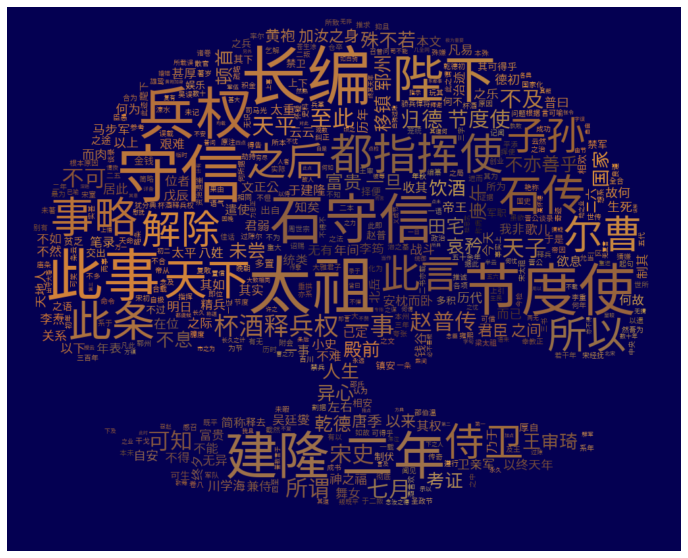

In [ ]:
# recolor wordcloud 
wc.recolor(color_func=ImageColorGenerator(mask), random_state=2)

# plot figure
plt.figure(figsize=(15,10))

# show image
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Well done! Now, we have made a nice word cloud with the shape of a tree. Feel free to play around with different options, such as different background colours, the mask, and the text. 

`Pay attention: when you select the mask image, the image needs to be large enough for the word cloud, otherwise, you will get an error.` 

## Downloading Image

After having our word cloud, you can right-click and directly download it. Another way to download the image is to use the function provided by **google.colab**. In the code below, we first convert our word cloud `wc` to a file called `wordcloud.png`, and then download it using `files.download()`.

In [ ]:
wc.to_file("wordcloud.png")
files.download("wordcloud.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Making a function

To simplify the full workflow, we can also create our function. You can better understand how to write a function [here](https://pinkychow1010.github.io/digital-chinese-history-blog/programming/chapter-1/level-1/2020/01/26/FunctionsNLoops_Basics.html). In this function, we will take the text, stopwords_path, mask_path, color_path, figsize, and font_path, and directly return an image.

In [38]:
def create_wordcloud(txt, stopwords_path, mask_path, color_path, figsize=(15,10), font_path="/content/drive/MyDrive/TaipeiSansTCBeta-Regular.ttf"):
  #color
  img = Image.open(color_path).convert("RGBA")
  color = Image.new("RGB", img.size, (255,255,255))
  color.paste(img,img)
  color = np.array(color)
  
  #shape
  shape = np.array(Image.open(mask_path))

  # create word cloud
  wc = WordCloud(background_color="#040052", max_words=2000,
                font_path=font_path,
                mask=shape,
                max_font_size=100, random_state=42, width=1000, height=860, margin=2)
  
  # create a word list from text
  word_list = jieba_processing_txt(txt, stopwords_path)
  
  # add word list to word cloud
  wc.generate(word_list)

  # recolor word cloud using ImageColorGenerator()
  wc.recolor(color_func=ImageColorGenerator(color), random_state=2)

  # display image
  plt.figure(figsize=figsize)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()
  
  return wc

Now, we can apply the new function to our word cloud!

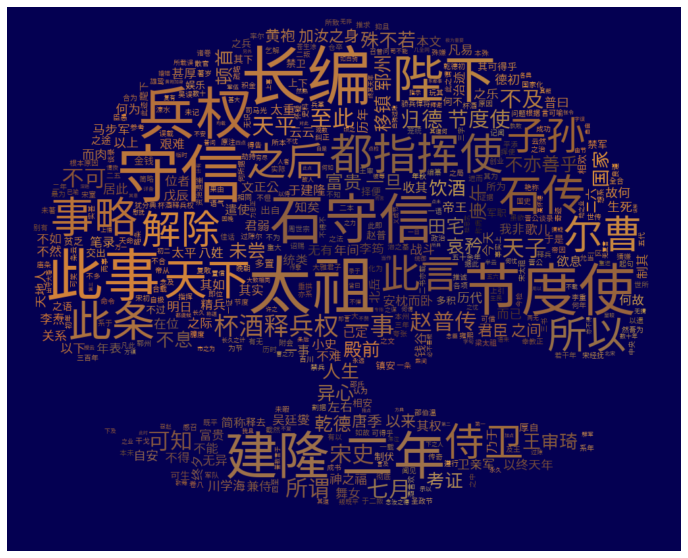

In [37]:
mask_path=r"/content/drive/MyDrive/tree.jpg"
color_path=r"/content/drive/MyDrive/song.jpg"

create_wordcloud(txt=txt, stopwords_path=stopwords_path, mask_path=mask_path, color_path=color_path)

# üéâ

Great that you have made it here üòé. Feel free to play around with functions to make sure you understand how everything works. You might have a question by now: **What if we do not want to copy a long text for the word cloud, from either grab it from a website or read it from a pdf file?** You will learn more in the future lesson.

<br>
<br>

***

## **Additional information**

This notebook is provided for educational purpose and feel free to report any issue on GitHub.

<br>

**Author:** Ka Hei, Chow

**License:** The code in this notebook is licensed under the [Creative Commons by Attribution 4.0 license](https://creativecommons.org/licenses/by/4.0/).

**Last modified:** January 2022

<br>

***

<br>

## **References:** 

https://github.com/stopwords-iso/stopwords-zh

[Yeung Wong & Carrie Lo from cyda](https://github.com/cydalytics/Chinese_Word_Cloud)